# Heatmaps

In [1]:
#import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
import bioframe
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
import matplotlib.colors as colors
import cooler
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import os
import glob
import pairtools
import random
import bbi
import cooltools
import multiprocess as mp


In [2]:
filepath_1 = '/nl/umw_job_dekker/users/as38w/JZ2022_git/coolers/JZ-MEF-AsiS1-ND-dmso6h-HiCD2R1.mm10.nodups.65M.1000.mcool::resolutions/250000'
filepath_2 = '/nl/umw_job_dekker/users/as38w/JZ2022_git/coolers/JZ-MEF-AsiS1-4OHT-dmso6h-HiCD2R1.mm10.nodups.65M.1000.mcool::resolutions/250000'

c1 = cooler.Cooler(filepath_1)
c2 = cooler.Cooler(filepath_2)


In [3]:
resolution = c1.binsize

mat_1 = c1.matrix(balance=True).fetch('chr2:5000000-175000000')
mat_2 = c2.matrix(balance=True).fetch('chr2:5000000-175000000')


/home/as38w/miniconda3/envs/coolerenv_manual_master/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log2


Text(0.5, 0.98, 'Hi-C resolution = 250kb, chr2:5000000-175000000, log2')

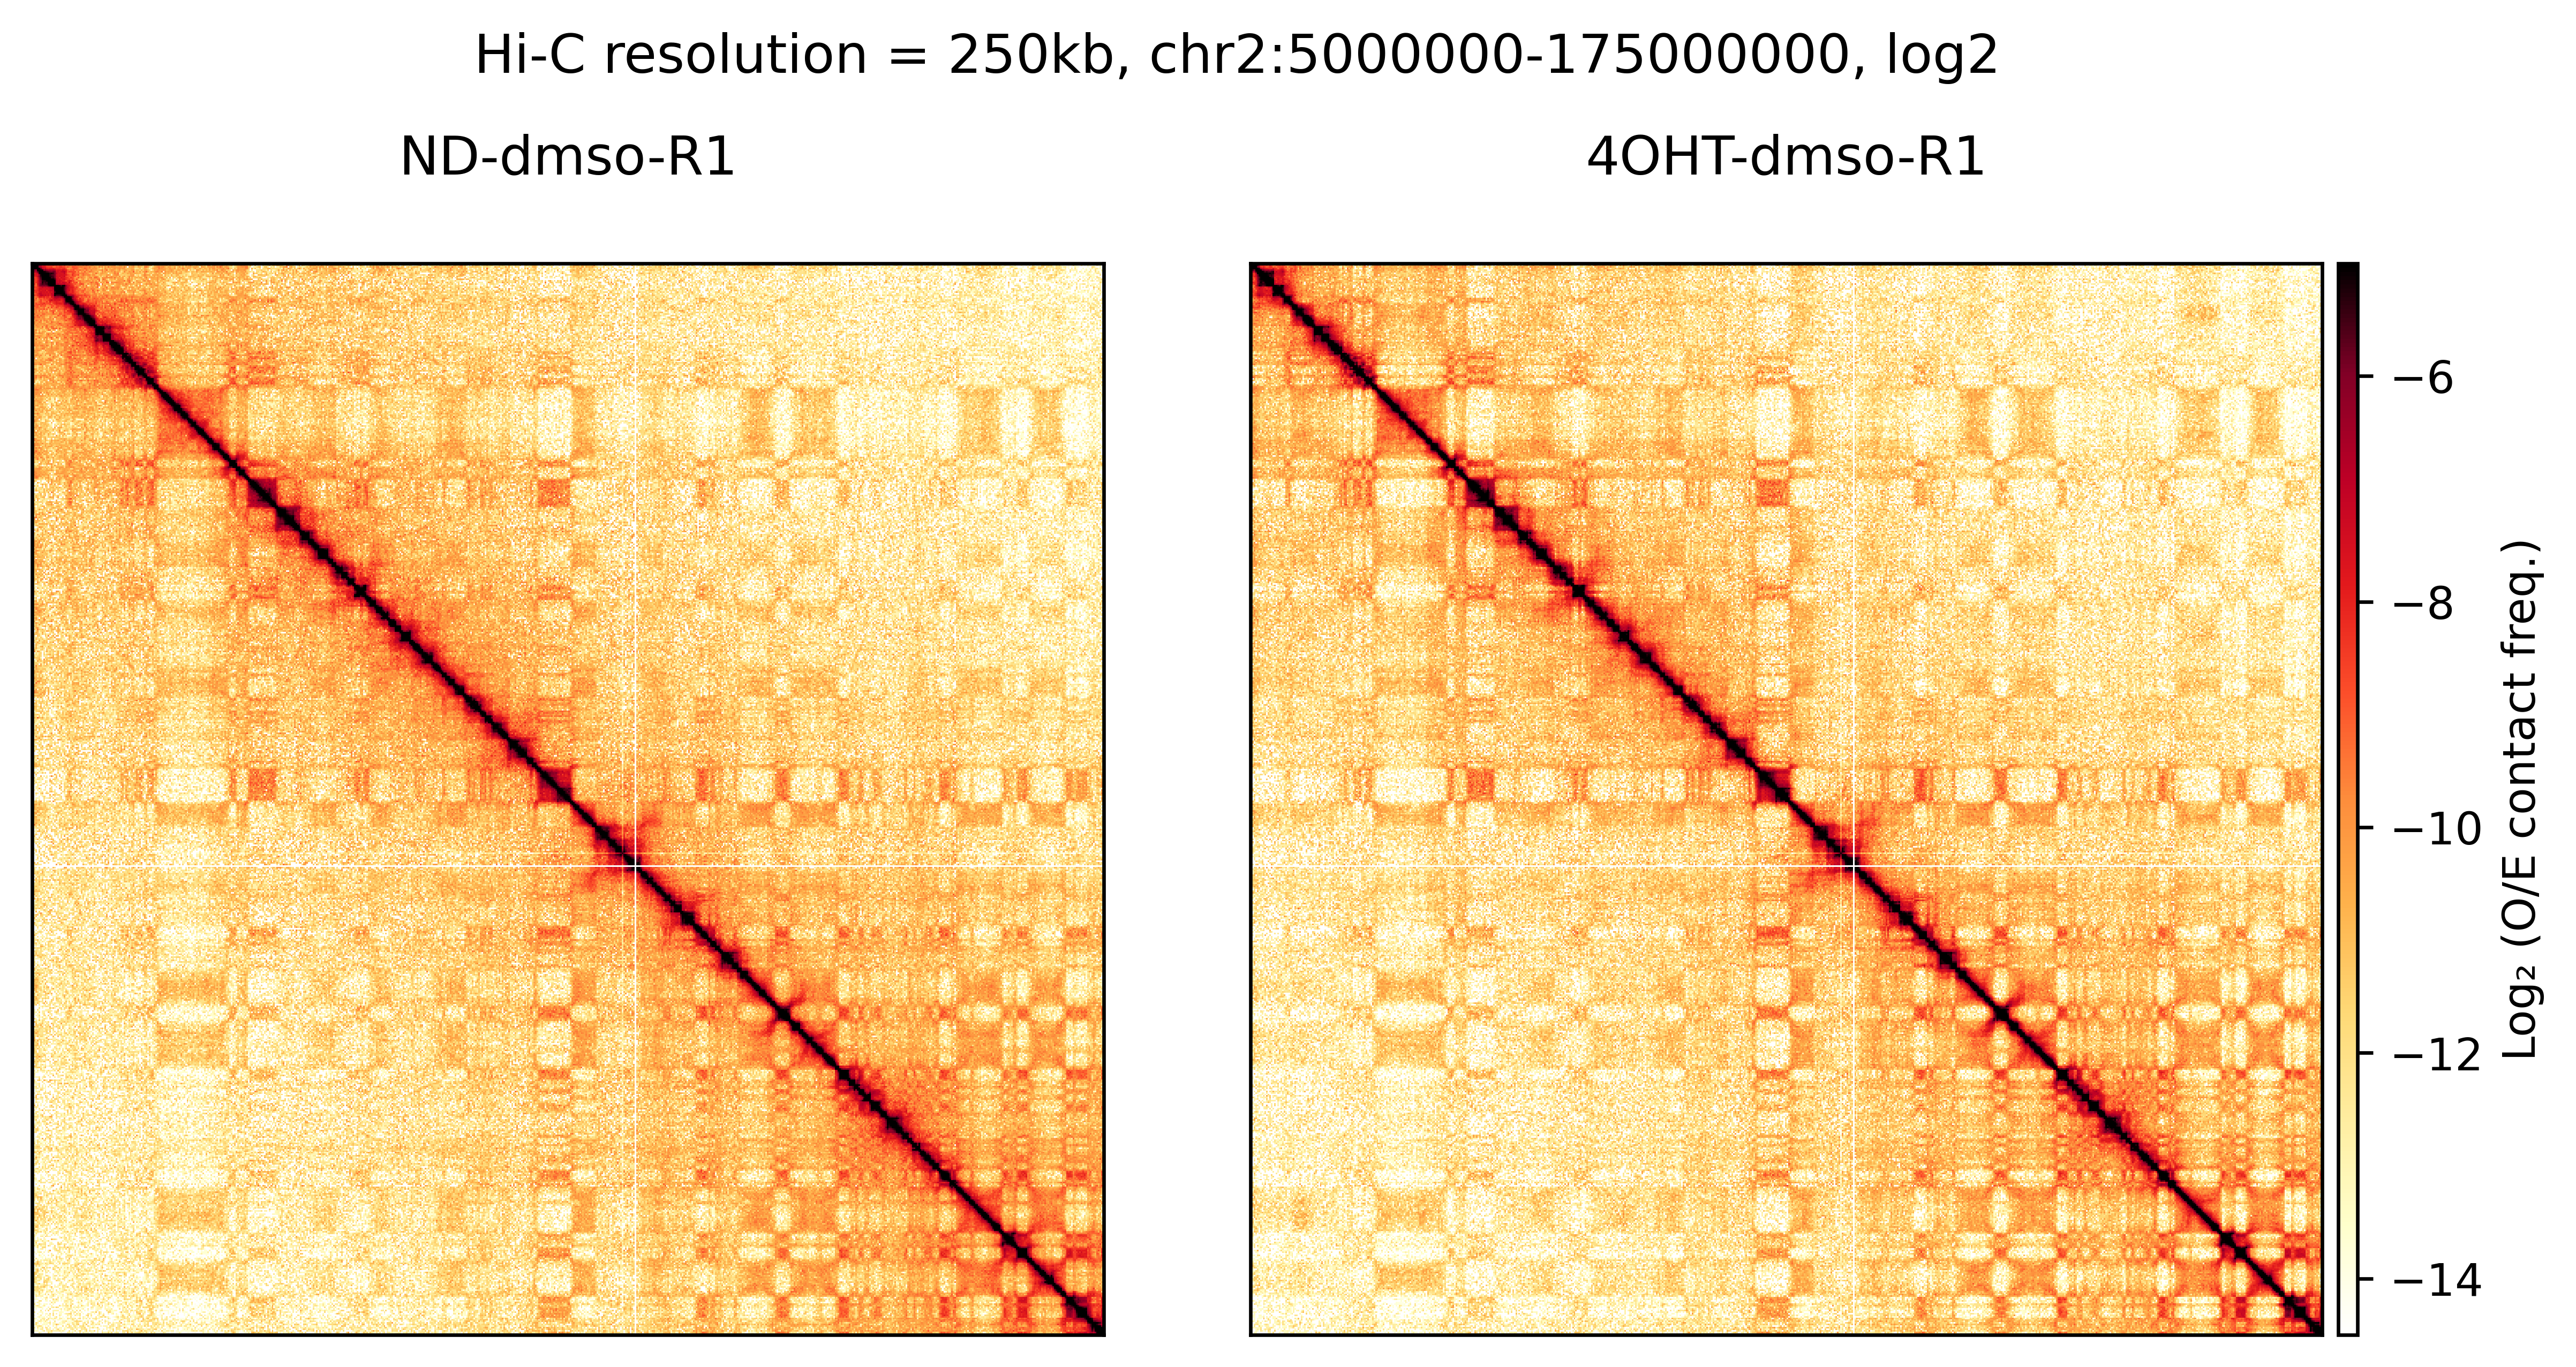

In [8]:
import cooltools.lib.plotting

matrices = [mat_1,
            mat_2]

titles = ['ND-dmso-R1',
            '4OHT-dmso-R1']

gs = GridSpec(nrows=1, ncols=len(matrices)+1, width_ratios=[20] * len(matrices)+[1])
fig=plt.figure(figsize=(5 * len(matrices), 5), dpi=600)

opts = dict(
    vmin=-14.5,
    vmax=-5,
    cmap = 'fall'
)

for i,agivenmatrix in enumerate(matrices):
    ax = plt.subplot(gs[i])
    img = ax.matshow(
        np.log2(agivenmatrix),  
        **opts)
    if i > 0:
        ax.yaxis.set_visible(False)
    plt.title(titles[i],pad=20)
    plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False, labeltop=False)

cax = fig.add_axes([ax.get_position().x1+0.005,ax.get_position().y0,0.006,ax.get_position().height])
plt.colorbar(img, cax=cax,label='Log\N{SUBSCRIPT TWO} (O/E contact freq.)')

plt.suptitle(f'Hi-C resolution = 250kb, chr2:5000000-175000000, log2')

#plt.savefig("*.pdf", dpi=300,bbox_inches='tight')


# Eigenvector track

In [9]:
ND_R1=pd.read_csv('/nl/umw_job_dekker/users/as38w/JZ-MEF-2020/sampled_2022/data/JZ-MEF-AsiS1-ND-dmso6h-HiCD2R1.mm10.250000.compcall.cis.vecs.tsv',sep='\t')
fOHT_R1=pd.read_csv('/nl/umw_job_dekker/users/as38w/JZ-MEF-2020/sampled_2022/data/JZ-MEF-AsiS1-4OHT-dmso6h-HiCD2R1.mm10.250000.compcall.cis.vecs.tsv',sep='\t')


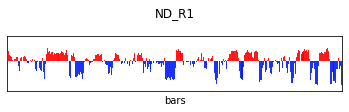

In [10]:
d1=ND_R1
d1=d1[d1['chrom']=='chr2']
d1=d1[d1['start']>=5000000]
d1=d1[d1['end']<=175000000]

d1aE1=(d1['E1'])
d1aE1 = np.array(d1aE1).ravel()
d1_df = pd.DataFrame()
d1_df['E1a'] = d1aE1.tolist()
d1_df['E1a']=d1_df['E1a'].where(d1_df['E1a']>=0,other=0)

bars=d1['start']
bars_df = pd.DataFrame(bars)
d1_df['bars']=bars.tolist()

d1bE1=(d1['E1'])
d1bE1 = np.array(d1bE1).ravel()
d1b_df = pd.DataFrame()
d1_df['E1b'] = d1bE1.tolist()
d1_df['E1b']=d1_df['E1b'].where(d1_df['E1b']<=0,other=0)

ax = d1_df.plot(x='bars', y="E1a", kind="bar",width=1.05,color='#fe0002',alpha=0.9,linewidth=0.25,figsize=[6, 1],zorder=5)
d1_df.plot(x="bars", y="E1b", kind="bar", width=1.05,ax=ax, color='#021bf9',alpha=0.9,linewidth=0.25,zorder=5)
ax.set_ylim(-2,1.7)
ax.get_legend().remove()
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False, labeltop=False)
plt.title('ND_R1',pad=20)
ax.locator_params(nbins=12.5, axis='x',tight=True)

#plt.savefig("*.pdf", bbox_inches='tight', dpi=300)


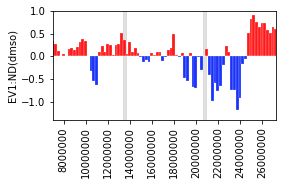

In [11]:
d1=ND_R1
d1=d1[d1['chrom']=='chr2']

d1aE1=(d1['E1'])
d1aE1 = np.array(d1aE1).ravel()
d1_df = pd.DataFrame()
d1_df['E1a'] = d1aE1.tolist()
d1_df['E1a']=d1_df['E1a'].where(d1_df['E1a']>=0,other=0)

bars=d1['start']
bars_df = pd.DataFrame(bars)
d1_df['bars']=bars.tolist()

d1bE1=(d1['E1'])
d1bE1 = np.array(d1bE1).ravel()
d1b_df = pd.DataFrame()
d1_df['E1b'] = d1bE1.tolist()
d1_df['E1b']=d1_df['E1b'].where(d1_df['E1b']<=0,other=0)

ax = d1_df.plot(x='bars', y="E1a", kind="bar",width=1.05,color='#fe0002',alpha=0.9,edgecolor='white',linewidth=0.25,figsize=[4, 2])
d1_df.plot(x="bars", y="E1b", kind="bar", width=1.05,ax=ax, color='#021bf9',alpha=0.9,edgecolor='white',linewidth=0.25)
ax.set_xlim(28,109)
ax.set_ylim(-1.4,1)
ax.get_legend().remove()
ax.axvspan(53.5,54.5,color = "lightgrey", alpha=0.7,zorder=0)
ax.axvspan(82.5, 83.5, color = "lightgrey", alpha=0.7,zorder=0)
ax.locator_params(nbins=200, axis='x',tight=True)
plt.tick_params(top=False, bottom=True, left=True, right=False,
                labelleft=True, labelbottom=True, labeltop=False)
plt.ylabel('EV1:ND(dmso)', fontsize=10)
plt.xlabel('')
ax.locator_params(nbins=100, axis='x',tight=True)

#plt.savefig("*.pdf", bbox_inches='tight', dpi=300)

